In [1]:
!pip install librosa

In [2]:
import numpy as np
import librosa.display, os
import matplotlib.pyplot as plt
%matplotlib inline

def create_spectrogram(audio_file, image_file):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)

    y, sr = librosa.load(audio_file)
    ms = librosa.feature.melspectrogram(y=y, sr=sr)
    log_ms = librosa.power_to_db(ms, ref=np.max)
    librosa.display.specshow(log_ms, sr=sr)

    fig.savefig(image_file)
    plt.close(fig)
    
def create_pngs_from_wavs(input_path, output_path):
    if not os.path.exists(output_path):
        os.makedirs(output_path)

    dir = os.listdir(input_path)

    for i, file in enumerate(dir):
        input_file = os.path.join(input_path, file)
        output_file = os.path.join(output_path, file.replace('.wav', '.png'))
        create_spectrogram(input_file, output_file)

In [3]:
create_pngs_from_wavs('Sounds/background', 'Spectrograms/background')

In [19]:
create_pngs_from_wavs('Sounds/chainsaw', 'Spectrograms/chainsaw')

In [20]:
create_pngs_from_wavs('Sounds/engine', 'Spectrograms/engine')

In [21]:
create_pngs_from_wavs('Sounds/storm', 'Spectrograms/storm')

In [7]:
!pip install --upgrade tensorflow

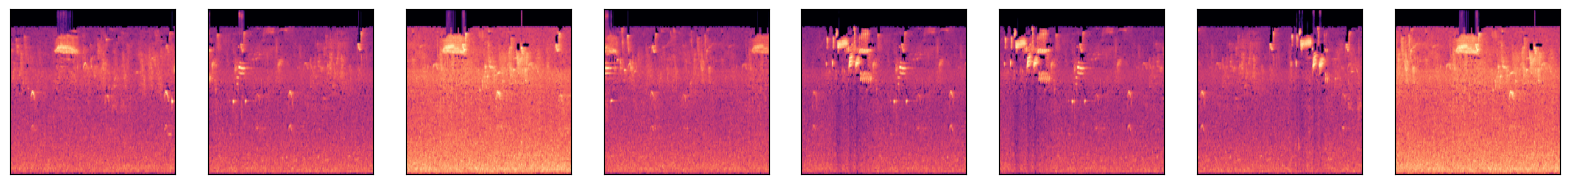

In [23]:
import os
import matplotlib.pyplot as plt
from keras.preprocessing import image
import numpy as np

def load_images_from_path(path, label):
    images = []
    labels = []

    for file in os.listdir(path):
        file_path = os.path.join(path, file)
        if os.path.isfile(file_path):  # Check if it's a file
            img = image.load_img(file_path, target_size=(224, 224))  # Target size should be (height, width)
            img_array = image.img_to_array(img)
            images.append(img_array)
            labels.append(label)
        
    return images, labels

def show_images(images):
    num_images = len(images)
    num_cols = min(num_images, 8)  # Display up to 8 images
    
    fig, axes = plt.subplots(1, num_cols, figsize=(20, 20), subplot_kw={'xticks': [], 'yticks': []})
    
    for i, ax in enumerate(axes.flat):
        if i < num_images:
            ax.imshow(images[i] / 255.0)
        else:
            ax.axis('off')  # Hide axes if fewer than 8 images
    
    plt.show()

x = []
y = []
images, labels = load_images_from_path('Spectrograms/background', 0)
show_images(images)
    
x += images
y += labels


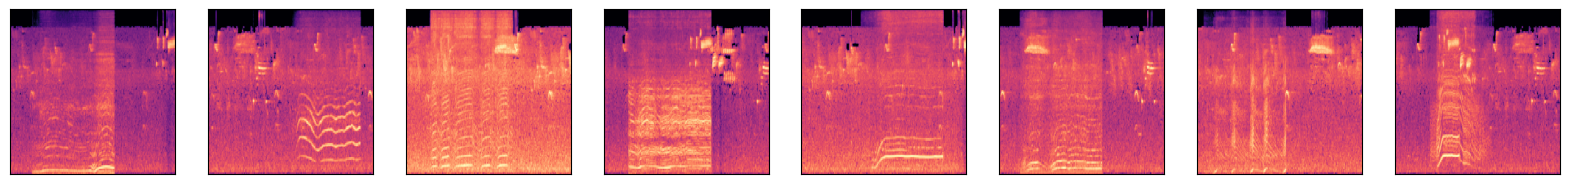

In [24]:
images, labels = load_images_from_path('Spectrograms/chainsaw', 1)
show_images(images)
    
x += images
y += labels


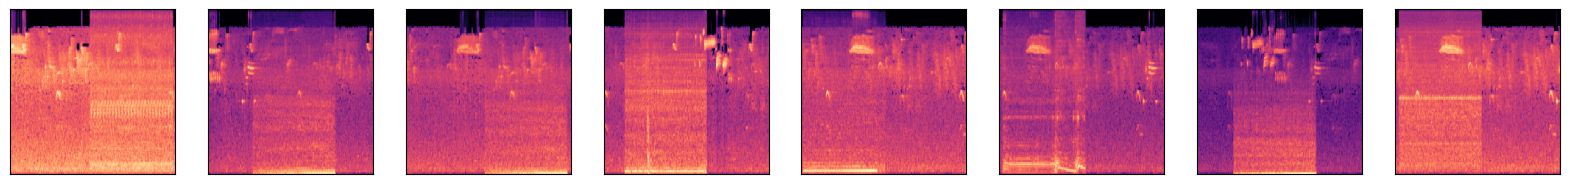

In [25]:
images, labels = load_images_from_path('Spectrograms/engine', 2)
show_images(images)
    
x += images
y += labels

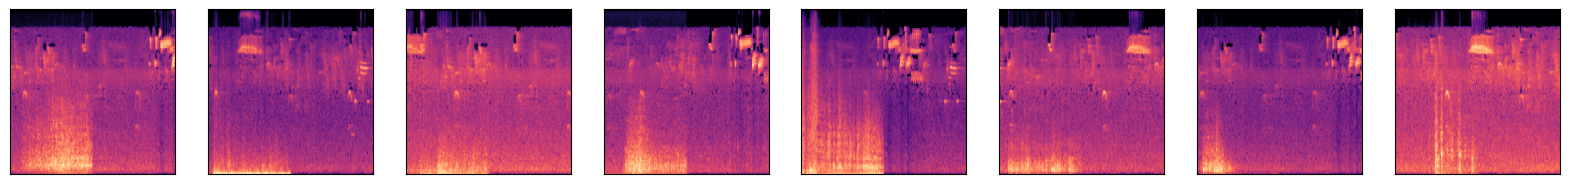

In [26]:
images, labels = load_images_from_path('Spectrograms/storm', 3)
show_images(images)
    
x += images
y += labels

In [27]:
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.3, random_state=0)

x_train_norm = np.array(x_train) / 255
x_test_norm = np.array(x_test) / 255

y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

In [28]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Flatten, Dense

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(4, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

/Users/aryanpatni1008/opt/miniconda3/envs/tf_env/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-08-16 16:32:07.617736: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2024-08-16 16:32:07.617882: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-08-16 16:32:07.617899: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-08-16 16:32:07.618060: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-08-16 16:32:07.618235: I tensorflow/core/common_runtime/pluggable_device/plugga

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 128)  │        36,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │    18,875,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │         4,100 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,212,548 (73.29 MB)

 Trainable params: 19,212,548 (73.29 MB)

 Non-trainable params: 0 (0.00 B)

In [29]:
hist = model.fit(x_train_norm, y_train_encoded, validation_data=(x_test_norm, y_test_encoded), batch_size=10, epochs=10)


Epoch 1/10


2024-08-16 16:35:51.677499: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


28/28 ━━━━━━━━━━━━━━━━━━━━ 13s 202ms/step - accuracy: 0.2527 - loss: 1.8158 - val_accuracy: 0.3833 - val_loss: 1.2043
Epoch 2/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 6s 204ms/step - accuracy: 0.5469 - loss: 1.0037 - val_accuracy: 0.6750 - val_loss: 0.6960
Epoch 3/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 6s 217ms/step - accuracy: 0.7026 - loss: 0.7378 - val_accuracy: 0.5750 - val_loss: 0.8410
Epoch 4/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 5s 194ms/step - accuracy: 0.6354 - loss: 0.7193 - val_accuracy: 0.5417 - val_loss: 0.8182
Epoch 5/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 5s 191ms/step - accuracy: 0.6746 - loss: 0.6492 - val_accuracy: 0.7333 - val_loss: 0.4938
Epoch 6/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 5s 195ms/step - accuracy: 0.7739 - loss: 0.4856 - val_accuracy: 0.7167 - val_loss: 0.5258
Epoch 7/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 6s 209ms/step - accuracy: 0.7959 - loss: 0.3731 - val_accuracy: 0.7500 - val_loss: 0.4833
Epoch 8/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 5s 195ms/step - accuracy: 0.8064 - loss: 0.3527 - val_accuracy: 0.7500 - val

[]

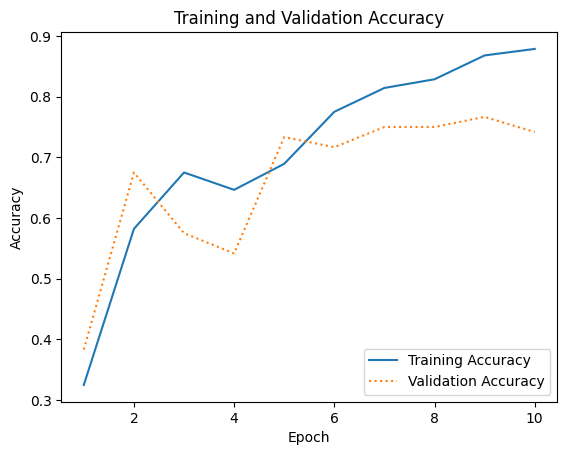

In [30]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training Accuracy')
plt.plot(epochs, val_acc, ':', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

In [35]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet import preprocess_input

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

x_train_norm = preprocess_input(np.array(x_train))
x_test_norm = preprocess_input(np.array(x_test))

train_features = base_model.predict(x_train_norm)
test_features = base_model.predict(x_test_norm)

9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 472ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 184ms/step


In [36]:
model = Sequential()
model.add(Flatten(input_shape=train_features.shape[1:]))
model.add(Dense(1024, activation='relu'))
model.add(Dense(4, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [37]:
hist = model.fit(train_features, y_train_encoded, validation_data=(test_features, y_test_encoded), batch_size=10, epochs=10)

Epoch 1/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 8s 213ms/step - accuracy: 0.4999 - loss: 40.3179 - val_accuracy: 0.7750 - val_loss: 12.1751
Epoch 2/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 6s 230ms/step - accuracy: 0.8990 - loss: 2.1486 - val_accuracy: 0.9000 - val_loss: 2.4036
Epoch 3/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 6s 208ms/step - accuracy: 0.9782 - loss: 0.6524 - val_accuracy: 0.9083 - val_loss: 2.4679
Epoch 4/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 6s 211ms/step - accuracy: 0.9382 - loss: 2.0307 - val_accuracy: 0.7667 - val_loss: 13.7344
Epoch 5/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 6s 209ms/step - accuracy: 0.9215 - loss: 2.5746 - val_accuracy: 0.8833 - val_loss: 6.6436
Epoch 6/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 6s 213ms/step - accuracy: 0.9765 - loss: 0.8463 - val_accuracy: 0.9083 - val_loss: 4.9172
Epoch 7/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 6s 209ms/step - accuracy: 0.9950 - loss: 0.2373 - val_accuracy: 0.9083 - val_loss: 4.0101
Epoch 8/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 6s 206ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accur

[]

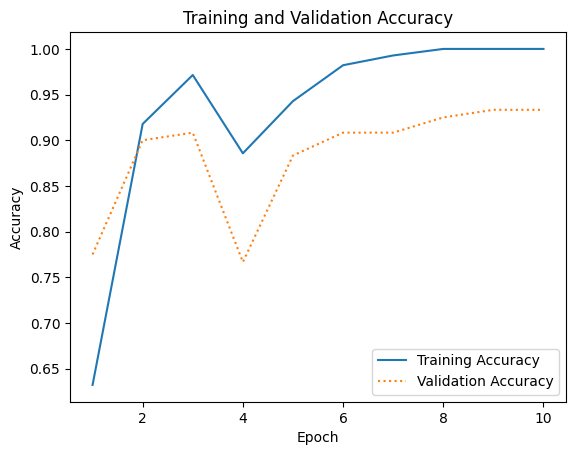

In [38]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training Accuracy')
plt.plot(epochs, val_acc, ':', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 116ms/step


Text(110.44999999999997, 0.5, 'Actual label')

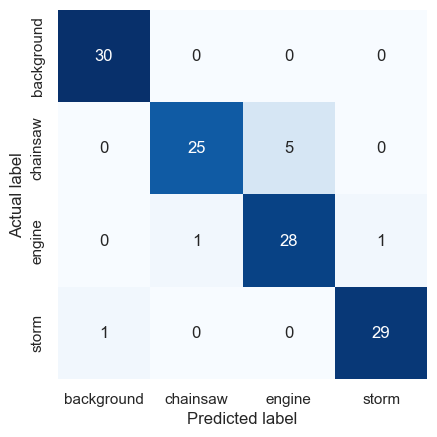

In [39]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.set()

y_predicted = model.predict(test_features)
mat = confusion_matrix(y_test_encoded.argmax(axis=1), y_predicted.argmax(axis=1))
class_labels = ['background', 'chainsaw', 'engine', 'storm']

sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=class_labels,
            yticklabels=class_labels)

plt.xlabel('Predicted label')
plt.ylabel('Actual label')

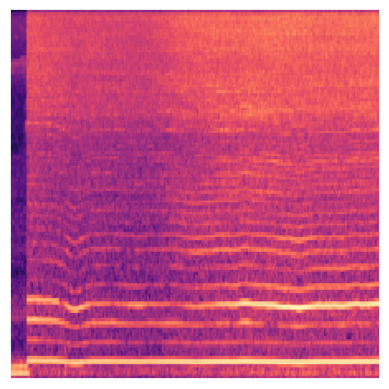

In [41]:
create_spectrogram('Sounds/samples/sample1.wav', 'Spectrograms/sample1.png')

x = image.load_img('Spectrograms/sample1.png', target_size=(224, 224))
plt.xticks([])
plt.yticks([])
plt.imshow(x)

In [42]:
x = image.img_to_array(x)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

y = base_model.predict(x)
predictions = model.predict(y)

for i, label in enumerate(class_labels):
    print(f'{label}: {predictions[0][i]}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
background: 0.0
chainsaw: 1.0
engine: 2.862287661400343e-21
storm: 0.0
